# Perceptron pour le reconnaissance de chiffres manuscrits

L'objectif de ce TP est de reconnaître des chiffres manuscrits d'une base de test à partir d'une base d'apprentissage et des réseaux de neurones. Les chiffres ont été normalisés et centrés dans une image de taille fixe $28\times 28$ pixels. 

On va travailler sur 2 bases de données de MNIST:
    - Standard: les chiffres manuscrits comprend un ensemble de 60 000 exemples d'apprentissage et un ensemble de 10 000 exemples de test. On va classifier 10 catégories de chiffres par perceptron (mono/multi couche).
    - DeepFake: l'idée est de distinguer les données Générées par un Modèle Générative GAN par apport aux chiffres manuscrits standard. On dispose de 4932x2 exemples d'apprentissage du chiffre 0 avec label real (standard), et label fake (généré). On va évaluer un modèle de classification binaire sur 991x2 exemples de test.

In [2]:
# importer des librairies avec tensorflow==1.15 , keras==2.3.1
import numpy as np
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Librairies et fonctions nécessaires au design des réseaux de neurones
import keras
from keras import layers
from keras import models
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Activation
from keras.models import Model, Sequential


# Chargement des données
### Standard

In [3]:
# Nombre de classes
num_classes = 10

# Chargement base d'apprentissage et de test 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalisation 
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# transformation des images (matrices 28 x 28) en vecteur de dimension 784 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 784)
60000 train samples
10000 test samples


# Perceptron mono couche
### Standard

In [4]:
# Création de l'architecture 
model = Sequential()
model.add(Dense(10, activation="softmax", input_dim=784))
model.summary()


2024-05-22 16:51:19.556878: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 16:51:19.731633: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-22 16:51:19.732096: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# Optimisation du modèle 

opt = keras.optimizers.Adam(learning_rate=1e-3) 

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])

history = model.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10


2024-05-22 16:51:24.769957: I external/local_xla/xla/service/service.cc:168] XLA service 0x732d80554cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-22 16:51:24.770010: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A500 Laptop GPU, Compute Capability 8.6
2024-05-22 16:51:24.779656: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-22 16:51:24.805782: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1716389484.929890   32738 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3750/3750 [==============================] - 11s 3ms/step - loss: 0.4152 - acc: 0.8888 - val_loss: 0.2923 - val_acc: 0.9196
Epoch 2/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2924 - acc: 0.9184 - val_loss: 0.2836 - val_acc: 0.9220
Epoch 3/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2765 - acc: 0.9234 - val_loss: 0.2772 - val_acc: 0.9213
Epoch 4/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2682 - acc: 0.9256 - val_loss: 0.2699 - val_acc: 0.9278
Epoch 5/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2631 - acc: 0.9267 - val_loss: 0.2677 - val_acc: 0.9258
Epoch 6/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2590 - acc: 0.9286 - val_loss: 0.2684 - val_acc: 0.9256
Epoch 7/10
3750/3750 [==============================] - 11s 3ms/step - loss: 0.2562 - acc: 0.9293 - val_loss: 0.2674 - val_acc: 0.9274
Epoch 8/10
3750/3750 [==============================] - 11s 3ms/st

In [6]:
# Analyse des résultats 

def plot_training_analysis():
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

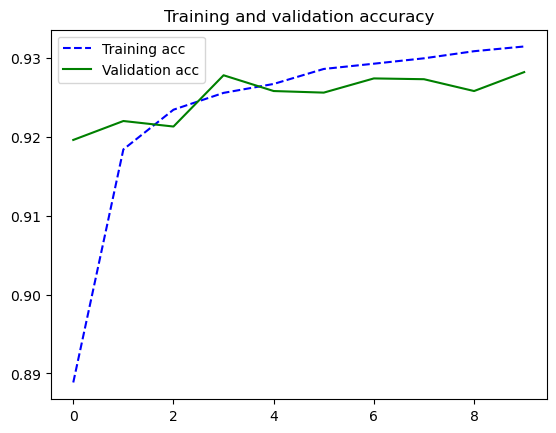

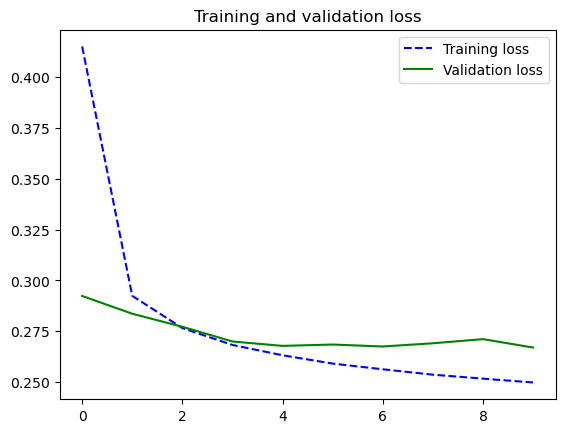

In [7]:
plot_training_analysis()

# Perceptron Multi-couches
### Standard

#### **DÉBUT MODIF**

In [13]:
# A vous de jouer !

# Création de l'architecture 
model2 = Sequential()
model2.add(Dense(10, activation="sigmoid", input_dim=784))
model2.add(Dense(10, activation="sigmoid"))
model2.add(Dense(10, activation="softmax"))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
Total params: 8070 (31.52 KB)
Trainable params: 8070 (31.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Optimisation du modèle 

opt2 = keras.optimizers.Adam(learning_rate=1e-3) 

model2.compile(loss='categorical_crossentropy',
              optimizer=opt2,
              metrics=['acc'])

history = model2.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 16s 4ms/step - loss: 1.1742 - acc: 0.7231 - val_loss: 0.5825 - val_acc: 0.8571
Epoch 2/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.4747 - acc: 0.8770 - val_loss: 0.3985 - val_acc: 0.8912
Epoch 3/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.3685 - acc: 0.8996 - val_loss: 0.3441 - val_acc: 0.9051
Epoch 4/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.3245 - acc: 0.9089 - val_loss: 0.3100 - val_acc: 0.9135
Epoch 5/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2979 - acc: 0.9162 - val_loss: 0.2952 - val_acc: 0.9182
Epoch 6/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2801 - acc: 0.9202 - val_loss: 0.2903 - val_acc: 0.9184
Epoch 7/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.2671 - acc: 0.9237 - val_loss: 0.2757 - val_acc: 0.9226
Epoch 8/10
3750/3750 [==============================] -

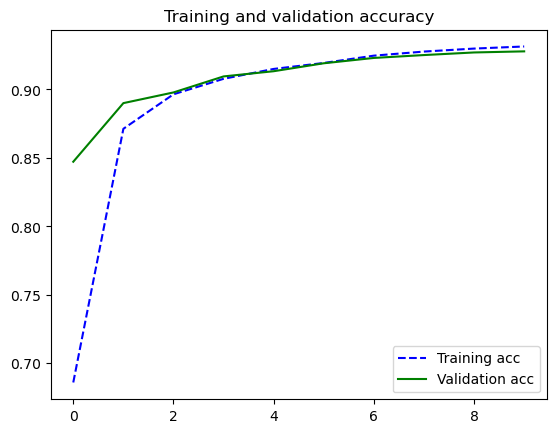

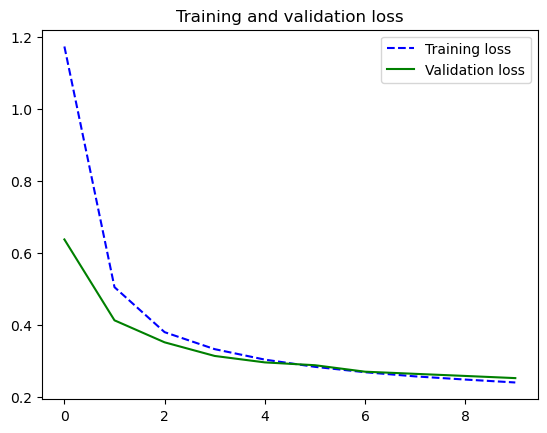

In [12]:
plot_training_analysis()

#### Un autre modèle multi-couches

In [ ]:
# Création de l'architecture 
model3 = Sequential()
model3.add(Dense(10, activation="sigmoid", input_dim=784))
model3.add(Dense(5, activation="sigmoid", input_dim=784))
model3.add(Dense(5, activation="sigmoid", input_dim=784))
model3.add(Dense(5, activation="sigmoid", input_dim=784))
model3.add(Dense(5, activation="sigmoid", input_dim=784))
model3.add(Dense(10, activation="softmax", input_dim=784))
model3.summary()

#### Meilleur modèle selon le prof

In [19]:
modelprof = Sequential()
modelprof.add(Dense(784, activation="relu", input_dim=784))
modelprof.add(Dense(800, activation="relu"))
modelprof.add(Dense(800, activation="relu"))
modelprof.add(Dense(10, activation="softmax"))
modelprof.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 784)               615440    
                                                                 
 dense_13 (Dense)            (None, 800)               628000    
                                                                 
 dense_14 (Dense)            (None, 800)               640800    
                                                                 
 dense_15 (Dense)            (None, 10)                8010      
                                                                 
Total params: 1892250 (7.22 MB)
Trainable params: 1892250 (7.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Optimisation du modèle 

optprof = keras.optimizers.Adam(learning_rate=1e-3) 

modelprof.compile(loss='categorical_crossentropy',
              optimizer=optprof,
              metrics=['acc'])

history = modelprof.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.2090 - acc: 0.9383 - val_loss: 0.1168 - val_acc: 0.9661
Epoch 2/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.1082 - acc: 0.9695 - val_loss: 0.0822 - val_acc: 0.9766
Epoch 3/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0808 - acc: 0.9764 - val_loss: 0.1090 - val_acc: 0.9712
Epoch 4/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0676 - acc: 0.9812 - val_loss: 0.1048 - val_acc: 0.9730
Epoch 5/10
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0573 - acc: 0.9838 - val_loss: 0.1055 - val_acc: 0.9731
Epoch 6/10
3750/3750 [==============================] - 13s 4ms/step - loss: 0.0499 - acc: 0.9862 - val_loss: 0.1046 - val_acc: 0.9784
Epoch 7/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0446 - acc: 0.9879 - val_loss: 0.1201 - val_acc: 0.9752
Epoch 8/10
3750/3750 [==============================] -

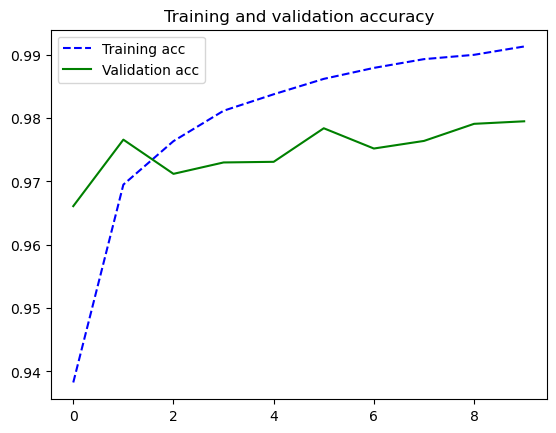

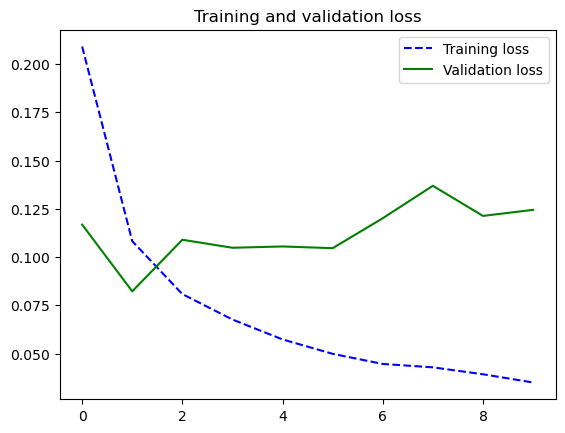

In [21]:
plot_training_analysis()

#### Autre modèle pour remettre en question le meilleur modèle

In [15]:
model4 = Sequential()
model4.add(Dense(784, activation="relu", input_dim=784))
model4.add(Dense(800, activation="relu"))
model4.add(Dense(800, activation="relu"))
model4.add(Dense(800, activation="relu"))
model4.add(Dense(10, activation="softmax"))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 784)               615440    
                                                                 
 dense_8 (Dense)             (None, 800)               628000    
                                                                 
 dense_9 (Dense)             (None, 800)               640800    
                                                                 
 dense_10 (Dense)            (None, 800)               640800    
                                                                 
 dense_11 (Dense)            (None, 10)                8010      
                                                                 
Total params: 2533050 (9.66 MB)
Trainable params: 2533050 (9.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Optimisation du modèle 

opt4 = keras.optimizers.Adam(learning_rate=1e-3) 

model4.compile(loss='categorical_crossentropy',
              optimizer=opt4,
              metrics=['acc'])

history = model4.fit(x_train, y_train,
          epochs=10,
          validation_data=(x_test, y_test),
          batch_size=16)

Epoch 1/10
3750/3750 [==============================] - 22s 6ms/step - loss: 0.2419 - acc: 0.9329 - val_loss: 0.1742 - val_acc: 0.9584
Epoch 2/10
3750/3750 [==============================] - 16s 4ms/step - loss: 0.1254 - acc: 0.9663 - val_loss: 0.1553 - val_acc: 0.9688
Epoch 3/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0942 - acc: 0.9748 - val_loss: 0.0983 - val_acc: 0.9739
Epoch 4/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0752 - acc: 0.9796 - val_loss: 0.1037 - val_acc: 0.9752
Epoch 5/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0657 - acc: 0.9830 - val_loss: 0.1005 - val_acc: 0.9755
Epoch 6/10
3750/3750 [==============================] - 14s 4ms/step - loss: 0.0564 - acc: 0.9850 - val_loss: 0.1084 - val_acc: 0.9769
Epoch 7/10
3750/3750 [==============================] - 15s 4ms/step - loss: 0.0517 - acc: 0.9863 - val_loss: 0.0956 - val_acc: 0.9795
Epoch 8/10
3750/3750 [==============================] -

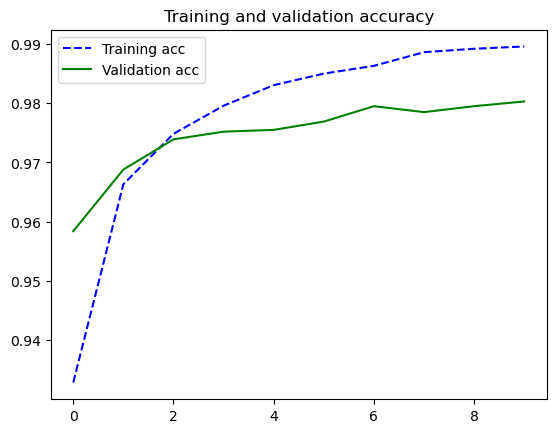

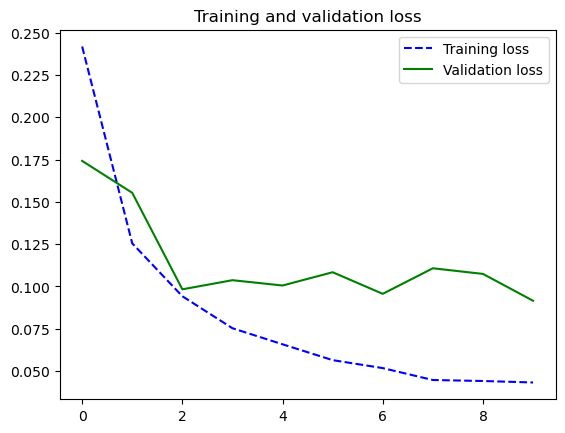

In [17]:
plot_training_analysis()

#### **FIN MODIF**

# Chargement des données
### DeepFake

In [24]:
# Nombre de classes
num_classes = 2

# Utiliser read_real_data et read_fake_data
# dans utils pour charger les donnees
from utils import read_real_data, read_fake_data

x_train_real = read_real_data('real_mnist_digit0_train')
x_train_fake = read_fake_data('fake_mnist_digit0_train')
x_test_real = read_real_data('real_mnist_digit0_val')
x_test_fake = read_fake_data('fake_mnist_digit0_val')

x_train = np.concatenate([x_train_real,x_train_fake],axis=0)
x_test = np.concatenate([x_test_real,x_test_fake],axis=0)

print('x_train',x_train.shape)
print('x_test',x_test.shape)

# Build y_train et y_test for x_train and x_test
# Denote the label real by 0
# Denote the label fake by 1
y_train = np.ones(x_train.shape[0])
# TODO

# FIN TODO

y_test = np.ones(x_test.shape[0])
# TODO

# Shuffle (a test)
rng_state = np.random.get_state()
arr1 = np.arange(10)
arr2 = np.arange(10)
np.random.shuffle(arr1)
np.random.set_state(rng_state)
np.random.shuffle(arr2)
print(arr1)
print(arr2)

# Shuffle training and test images and labels in a random order (index) 
rng_state = np.random.get_state()
np.random.shuffle(x_train)
np.random.set_state(rng_state)
np.random.shuffle(y_train)

rng_state = np.random.get_state()
np.random.shuffle(x_test)
np.random.set_state(rng_state)
np.random.shuffle(y_test)

# transformation des images (matrices 28 x 28) en vecteur de dimension 784 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]*x_test.shape[2]))
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)


SyntaxError: unterminated string literal (detected at line 15) (utils.py, line 15)

In [ ]:
# Visualize une image
img = x_train[0,:].reshape(28,28)
plt.imshow(img)
plt.colorbar()

# Representation d'un label
label = y_test[0]
print(label)

# Perceptron mono couche
### DeepFake

In [1]:
# A vous de jouer !

# Perceptron Multi-couches
### DeepFake

In [2]:
# A vous de jouer !